# 1. Spielzeugdatensatz
Laden Sie sich das Jupyter-Notebook ”Training eines MLPs auf MNIST” von der Vorlesungsseite
auf Moodle herunter, das den Numpy-Code für den Backpropagation-Algorithmus für
MLPs enthält. Statt auf MNIST werden wir zunächst ein einfacheres Perzeptron auf den
Spielzeugdaten aus der Vorlesung trainieren.

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
%load_ext version_information

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


1. Erzeugen Sie 200 zweidimensionale Trainingsdatenpunkte mithilfe einer Gleichverteilung
über dem Gebiet [−6, 6]×[−6, 6]. Speichern Sie diese in einer 200×2 Designmatrix.

In [43]:
X1 = np.random.uniform(-6,6,200)
X2 = np.random.uniform(-6,6,200)
X = np.column_stack((X1,X2))
X.shape

(200, 2)

2. Die Klassenlabels 0 und 1 werden so vergeben, dass alle Datenpunkte im 1. und 3.
Quadranten das Label 1 und im 2. und 4. Quadranten das Label 0 erhalten. Speichern
Sie die Labels in einem Array.

In [44]:
x1 = X[:,0]<0
x2 = X[:,1]>0
x_q1 = x1*x2
y_q1 = x_q1*1

x3 = X[:,0]>0
x4 = X[:,1]<0
x_q3 = x3*x4
y_q3 = x_q3*1

y_ges = y_q1 + y_q3 
y_ges = np.array([y_ges]).T

X_train = X
y_train = y_ges

3. Erzeugen Sie einen gleich großen Testdatensatz nach demselben Prinzip. Stellen Sie
beide Datensätze zur Überprüfung als Scatterplot dar.

In [45]:
# Testmatrix erzeugen
X1 = np.random.uniform(-6,6,200)
X2 = np.random.uniform(-6,6,200)
X = np.column_stack((X1,X2))

# Klassenlabels entsprechend Quadrant vergeben
x1 = X[:,0]<0
x2 = X[:,1]>0
x_q1 = x1*x2
y_q1 = x_q1*1

x3 = X[:,0]>0
x4 = X[:,1]<0
x_q3 = x3*x4
y_q3 = x_q3*1 

y_ges = y_q1 + y_q3 
y_ges = np.array([y_ges]).T

X_test = X
y_test = y_ges

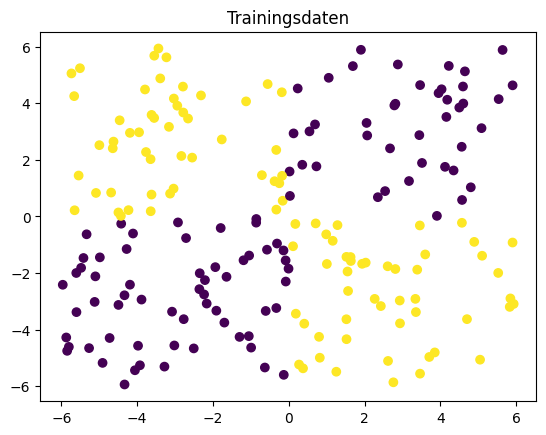

In [46]:
plt.title("Trainingsdaten")
plt.scatter(X_train[:,0], X_train[:,1],c=y_train)

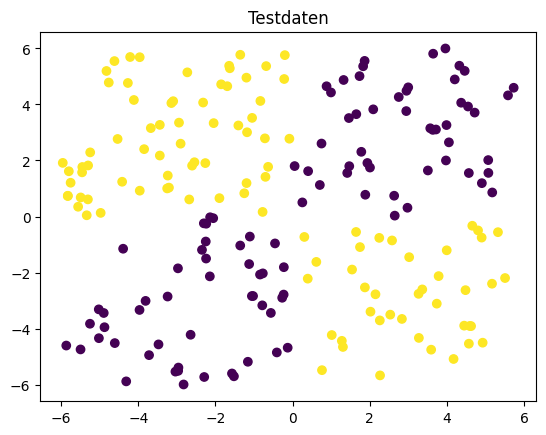

In [47]:
plt.title("Testdaten")
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)

4. Das in der Vorlesung dargestellte Experiment operiert nicht direkt auf den Inputdaten,
sondern auf 2 Merkmalen, die mithilfe zweier Neuronen mit fixem Gewichtsvektor
berechnet werden: ein Neuron teilt die Inputebene waagrecht entlang der x-Achse, das
andere senkrecht entlang der y-Achse. Wie muss der Gewichtsvektor für das jeweilige
Neuron aussehen?

In [48]:
# Zwei eindimensionale Eingangswerte: Der Gewichtsvektor hat die Form (2, 1).
w1 = np.array([1,0])
w2 = np.array([0,1])
print(np.array([w1, w2]))

[[1 0]
 [0 1]]


5. Berechnen Sie die Entscheidungsfunktion beider Neuron mit der im Beispielcode
angegebenen sigmoiden Aktivierungsfunktion auf einem 100 × 100-Gitter innerhalb
des Gebietes [−6, 6] × [−6, 6] und stellen Sie diese zur Überprüfung als Farbbild dar.

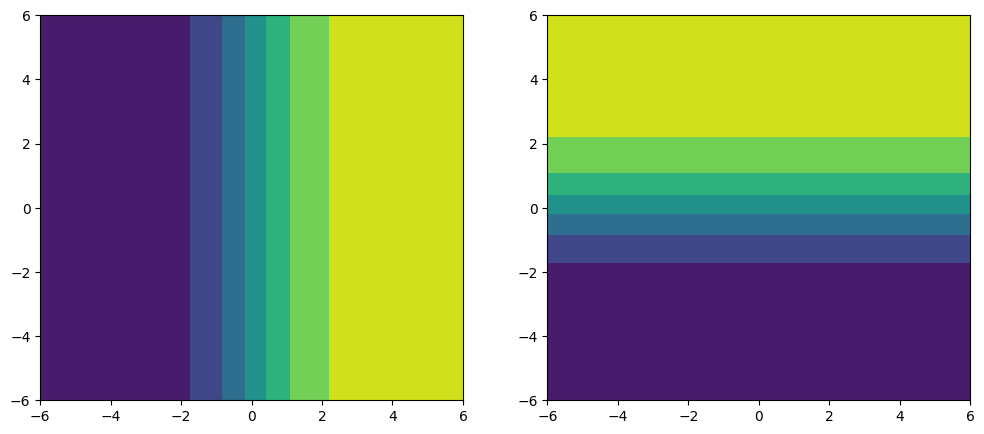

In [49]:
# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

# Ableitung des Sigmoids
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

# Ableitung der MSE-Kostenfunktion
def cost_derivative(output_activations, y):
    """Return the vector of partial derivatives partial C_x /
    partial a for the output activations."""
    return (output_activations-y)

# Funktion zur Berechnung der Entscheidungsfunktion eines Neurons
def Entscheidungsfunktion(x, y, weights):
    linear_combination = weights[0] * x + weights[1] * y
    return sigmoid(linear_combination)

# Gitter erstellen
x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)

# Neuron 1: teilt die Inputebene waagrecht entlang der x-Achse
neuron1 = Entscheidungsfunktion(x_grid, y_grid, w1)

# Neuron 2: teilt die Inputebene senkrecht entlang der y-Achse
neuron2 = Entscheidungsfunktion(x_grid, y_grid, w2)

# Darstellung der Ergebnisse als Farbbilder
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(x_grid, y_grid, neuron1)

plt.subplot(1, 2, 2)
plt.contourf(x_grid, y_grid, neuron2)

plt.show()

6. Da die Eingangsneuronen nicht mittrainiert werden, können wir deren Output schon
im Vorfeld berechnen. Erzeugen Sie dazu neue Designmatritzen für den Trainings und
Testdatensatz, so dass die erste Spalte den Output des ersten Neurons und die
zweite Spalte den Output des zweiten Neurons enthält. Erzeugen Sie auch eine entsprechende
Designmatrix für Ihr 100 × 100-Gitter, das wir später zu Darstellungszwecken
brauchen werden. Wichtig: arbeiten Sie im Folgenden nur mit diesen transformierten
Designmatritzen, um korrekte Ergebnisse zu erhalten!

In [50]:
def BerechneNeuronenOutput(w, X):
    return sigmoid(np.sum(w.T * X))

train_design_matrix = np.zeros((len(X_train), 2))
for index, x in enumerate(X_train):
    train_design_matrix[index, 0] = BerechneNeuronenOutput(w1, x)
    train_design_matrix[index, 1] = BerechneNeuronenOutput(w2, x)

test_design_matrix = np.zeros((len(X_test), 2))
for index, x in enumerate(X_test):
    test_design_matrix[index, 0] = BerechneNeuronenOutput(w1, x)
    test_design_matrix[index, 1] = BerechneNeuronenOutput(w2, x)

train_design_matrix[:5,:]

array([[0.4600955 , 0.63546905],
       [0.98460306, 0.97120585],
       [0.93209621, 0.00601957],
       [0.82067751, 0.02575834],
       [0.00680764, 0.19073987]])

In [51]:
grid_design_matrix = np.zeros((2, 100*100))
step = 12/100
index = 0
for x in np.arange(-6, 6, step):
    for y in np.arange(-6, 6, step):
        input = np.array([x, y])
        grid_design_matrix[0, index] = BerechneNeuronenOutput(w1[0], input)
        grid_design_matrix[1, index] = BerechneNeuronenOutput(w2[1], input)
        index += 1

grid_design_matrix

array([[6.14417460e-06, 6.92753209e-06, 7.81076373e-06, ...,
        9.99990071e-01, 9.99991193e-01, 9.99992189e-01],
       [6.14417460e-06, 6.92753209e-06, 7.81076373e-06, ...,
        9.99990071e-01, 9.99991193e-01, 9.99992189e-01]])

# 2. Training eines MLPs auf den Spielzeugdaten
Der Code aus dem Beispielnotebook muss zunächst an das Szenario aus der Vorlesung angepasst
werden: ein deutlich kleineres Netzwerk mit eindimensionalem statt zehndimensionalem
Output.

1. Setzen Sie im Code die Größe der Minibatches auf 10, die Anzahl der Epochen
auf 150 und die Lernrate auf 0.03. Ändern Sie die Netzarchitektur so ab, dass sie 2
Eingangsneuronen, 2 verdeckte Schichten mit jeweils 2 Neuronen und 1 Ausgangsneuron
haben. Überprüfen Sie die Größen der sich daraus ergebenden Gewichtsmatritzen auf
Korrektheit.

In [52]:
mbs = 10                                        # Größe der Minibatches
eta = 3.0                                       # Lernrate
epochs = 150                                    # Anzahl Epochen
sizes = [2, 2, 2, 1]        # Vierschichtiges MPL mit 2 Eingangs-, 2x2 versteckten und 1 Ausgangsneuronen
num_layers = len(sizes)                         # Anzahl Schichten

# Arrays für Gewichte und Schwellwerte (initialisiert mit Gaußschem Rauschen)
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
print(weights[1].shape)

(2, 2)


2. Der Beispielcode verwendet One-Hot-Coding für die Labels, in unserem Beispiel sind
die Klassenzugehörigkeiten aber durch die Klassenindizes 0 und 1 codiert. Wir müssen
daher die Funktion evaluate() im Code so abändern, dass ein Beispiel als korrekt
klassifiziert gilt, wenn bei Klasse 0 der MLP-Output kleiner als 0.5 ist und bei Klasse 1
größer als 0.5. Berechnen Sie zusätzlich den MSE in dieser Funktion bei jedem Aufruf
uns speichern Sie diesen in einem zusätzlichen Array ab.

In [53]:
from sklearn.metrics import mean_squared_error

# Ableitung der MSE-Kostenfunktion
def cost_derivative(output_activations, y):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations."""
    return (output_activations-y)

def feedforward(a):
    """Return the output of the network if ``a`` is input."""
    for b, w in zip(biases, weights):
        a = sigmoid(np.dot(w, a)+b)
    return a

def backprop(x, y):
    """Return a tuple ``(nabla_b, nabla_w)`` representing the
    gradient for the cost function C_x.  ``nabla_b`` and
    ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
    to ``self.biases`` and ``self.weights``."""
    
    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Vorwärtslauf
    activation = x # Initialisierung a^1 = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(biases, weights):
        z = np.dot(w, activation) + b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)
    
    # Rückwärtslauf
    delta = cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1]) # Fehler am Output
    nabla_b[-1] = delta # Update Schwellwert in der Ausgangsschicht
    nabla_w[-1] = np.dot(delta, activations[-2].transpose()) # Update Gewichte in der Ausgangsschicht
    for l in range(2, num_layers): # Backpropagation
        z = zs[-l] # gewichteter Input
        sp = sigmoid_prime(z) # Ableitung der Aktivierungsfunktion
        delta = np.dot(weights[-l+1].transpose(), delta) * sp # Fehler in Schicht l
        nabla_b[-l] = delta # Update Schwellwert 
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose()) # Update Gewichte

    return (nabla_b, nabla_w)

def update_mini_batch(xmb, ymb, eta):
    """Update the network's weights and biases by applying
    gradient descent using backpropagation to a single mini batch.
    The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
    is the learning rate."""
    global weights
    global biases

    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Gehe durch alle Beispielpaare im Minibatch
    for i in range(xmb.shape[0]):
        x = np.reshape(xmb[i,:],(xmb.shape[1],1)).copy()
        if len(ymb.shape) == 2:
            y = np.reshape(ymb[i,:],(ymb.shape[1],1)).copy()
        else:
            y = ymb[i].copy()
        
        # Berechne Updates für alle Schichten über Backprop
        delta_nabla_b, delta_nabla_w = backprop(x, y)
        
        # Addiere einzelne Updates auf
        nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    
    # Berechne neue Gewichte
    weights = [w-(eta/xmb.shape[0])*nw
                    for w, nw in zip(weights, nabla_w)]
    biases = [b-(eta/xmb.shape[0])*nb
                   for b, nb in zip(biases, nabla_b)]
    
    return (weights, biases)

def evaluate(x2, y2):
    """Return the number of test inputs for which the neural
    network outputs the correct result. Note that the neural
    network's output is assumed to be the index of whichever
    neuron in the final layer has the highest activation."""
    
    correct = 0 # Anzahl korrekt klassifizierter Testbeispiele    
    y_array = []
    y_pred_array = []
    
    # Gehe den Testdatensatz durch
    for i in range(0, x2.shape[0]):
        x = np.reshape(x2[i,:],(x2.shape[1],1)).copy()
        if len(y2.shape) == 2:
            y = np.reshape(y2[i,:],(y2.shape[1],1)).copy()
        else:
            y = y2[i].copy()
        
        # Vorwärtslauf
        y_pred = feedforward(x)
        y_pred_array.append(y_pred[0])
        y_array.append(y[0])
        
        if y <= 0:
          c = -1
        else:
          c = 1
        
        if y_pred <= 0:
          c_pred = -1
        else:
          c_pred = 1
        
        if c == c_pred:
            correct += 1

    mse = np.nan_to_num(mean_squared_error(y_array, y_pred_array))
        
    return correct, mse

def SGD(x0, y0, epochs, mini_batch_size, eta, x2, y2):

    n_test = x2.shape[0] # Anzahl Testdaten
    n = x0.shape[0]      # Anzahl Trainingsdaten
    
    # gehe durch alle Epochen
    acc_val = np.zeros(epochs)
    mse = np.zeros(epochs)
    for j in range(epochs):
        
        # Bringe die Trainingsdaten in eine zufällige Reihenfolge für jede Epoche
        p = np.random.permutation(n) # Zufällige Permutation aller Indizes von 0 .. n-1
        x0 = x0[p,:]
        y0 = y0[p]
        
        # Zerlege den permutierten Datensatz in Minibatches 
        for k in range(0, n, mini_batch_size):
            xmb = x0[k:k+mini_batch_size,:]
            if len(y0.shape) == 2:
                ymb = y0[k:k+mini_batch_size,:]
            else:
                ymb = y0[k:k+mini_batch_size]
            update_mini_batch(xmb, ymb, eta)
        
        # Gib Performance aus
        acc_val[j], mse[j] = evaluate(x2, y2)
        print("Epoch {0}: {1} / {2}".format(j, acc_val[j], n_test))
    
    return acc_val, mse

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Sebastian Unger\AppData\Local\Temp\ipykernel_10656\992732741.py:5: SyntaxWarning: invalid escape sequence '\p'
  """Return the vector of partial derivatives \partial C_x /


In [54]:
acc_val, mse = SGD(train_design_matrix, y_train, epochs, mbs, eta, test_design_matrix, y_test)

Epoch 0: 103.0 / 200
Epoch 1: 103.0 / 200
Epoch 2: 103.0 / 200
Epoch 3: 103.0 / 200
Epoch 4: 103.0 / 200
Epoch 5: 103.0 / 200
Epoch 6: 103.0 / 200
Epoch 7: 103.0 / 200
Epoch 8: 103.0 / 200
Epoch 9: 103.0 / 200
Epoch 10: 103.0 / 200
Epoch 11: 103.0 / 200
Epoch 12: 103.0 / 200
Epoch 13: 103.0 / 200
Epoch 14: 103.0 / 200
Epoch 15: 103.0 / 200
Epoch 16: 103.0 / 200
Epoch 17: 103.0 / 200
Epoch 18: 103.0 / 200
Epoch 19: 103.0 / 200
Epoch 20: 103.0 / 200
Epoch 21: 103.0 / 200
Epoch 22: 103.0 / 200
Epoch 23: 103.0 / 200
Epoch 24: 103.0 / 200
Epoch 25: 103.0 / 200
Epoch 26: 103.0 / 200
Epoch 27: 103.0 / 200
Epoch 28: 103.0 / 200
Epoch 29: 103.0 / 200
Epoch 30: 103.0 / 200
Epoch 31: 103.0 / 200
Epoch 32: 103.0 / 200
Epoch 33: 103.0 / 200
Epoch 34: 103.0 / 200
Epoch 35: 103.0 / 200
Epoch 36: 103.0 / 200
Epoch 37: 103.0 / 200
Epoch 38: 103.0 / 200
Epoch 39: 103.0 / 200
Epoch 40: 103.0 / 200
Epoch 41: 103.0 / 200
Epoch 42: 103.0 / 200
Epoch 43: 103.0 / 200
Epoch 44: 103.0 / 200
Epoch 45: 103.0 / 20

3. Trainieren Sie Ihr Netz mit den Trainingsdaten als Validierungsdaten und testen Sie es
auf Ihren Testdaten. Stellen Sie die Lernkurven für Genauigkeit und MSE als Plots dar.
Beachten Sie hierbei, dass unser Lernproblem nicht konvex ist, so dass die Optimierung
zuweilen in lokalen Minima hängenbleiben kann. Wiederholen Sie Ihren Versuch daher
mehrere Male und vergeleichen Sie die Ergebnisse.

Epoch 0: 103.0 / 200
Epoch 1: 103.0 / 200
Epoch 2: 103.0 / 200
Epoch 3: 103.0 / 200
Epoch 4: 103.0 / 200
Epoch 5: 103.0 / 200
Epoch 6: 103.0 / 200
Epoch 7: 103.0 / 200
Epoch 8: 103.0 / 200
Epoch 9: 103.0 / 200
Epoch 10: 103.0 / 200
Epoch 11: 103.0 / 200
Epoch 12: 103.0 / 200
Epoch 13: 103.0 / 200
Epoch 14: 103.0 / 200
Epoch 15: 103.0 / 200
Epoch 16: 103.0 / 200
Epoch 17: 103.0 / 200
Epoch 18: 103.0 / 200
Epoch 19: 103.0 / 200
Epoch 20: 103.0 / 200
Epoch 21: 103.0 / 200
Epoch 22: 103.0 / 200
Epoch 23: 103.0 / 200
Epoch 24: 103.0 / 200
Epoch 25: 103.0 / 200
Epoch 26: 103.0 / 200
Epoch 27: 103.0 / 200
Epoch 28: 103.0 / 200
Epoch 29: 103.0 / 200
Epoch 30: 103.0 / 200
Epoch 31: 103.0 / 200
Epoch 32: 103.0 / 200
Epoch 33: 103.0 / 200
Epoch 34: 103.0 / 200
Epoch 35: 103.0 / 200
Epoch 36: 103.0 / 200
Epoch 37: 103.0 / 200
Epoch 38: 103.0 / 200
Epoch 39: 103.0 / 200
Epoch 40: 103.0 / 200
Epoch 41: 103.0 / 200
Epoch 42: 103.0 / 200
Epoch 43: 103.0 / 200
Epoch 44: 103.0 / 200
Epoch 45: 103.0 / 20

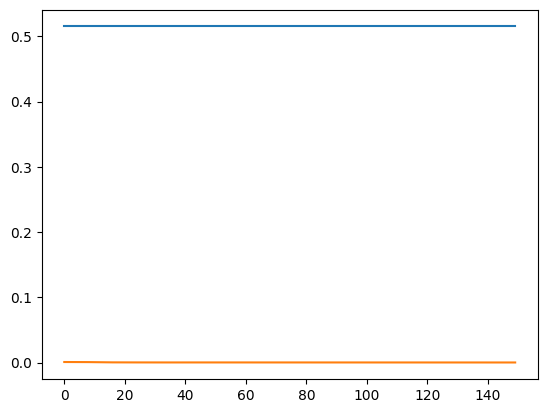

In [55]:
y_train_reshaped = np.reshape(y_train,(200,1))
y_test_reshaped = np.reshape(y_test,(200,1))

# Netz trainieren
acc_val, mse = SGD(train_design_matrix, y_train_reshaped, epochs, mbs, eta, test_design_matrix, y_test_reshaped)

# Lernkurve der Genauigkeit darstellen
plt.plot(acc_val / test_design_matrix.shape[0])

# Lernkurve des MSE darstellen
plt.plot(mse / test_design_matrix.shape[0])

4. Berechnen Sie die Entscheidungsfunktion Ihres MLPs für Ihr 100 × 100-Gitter und
stellen Sie diese gemeinsam mit dem Scatterplot Ihrer Trainingsdaten dar.

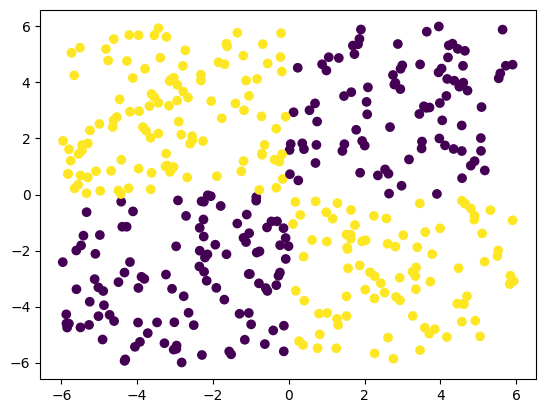

In [56]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

# 3. Nachvollziehen der Beispiele aus der Vorlesung

Das Netz aus der Vorlesung verwendet als Aktivierungsfunktion den Tangens hyperbolicus
(np.tanh()). Passen Sie die Funktionen sigmoid() und sigmoid_prime() entsprechend
an. Achtung: kommentieren Sie den bisherigen Code für die Sigmoidfunktion nur aus, wir
werden ihn in der nächsten Aufgabe nochmals benötigen. Da die Ausgangswerte von tanh
im Intervall [−1, 1] statt [0, 1] liegen, müssen wir hierfür nochmals die Funktion evaluate()
entsprechend anpassen. Vollziehen Sie die 3 Beispiele aus der Vorlesung nach.

In [57]:
# Neudefinition der Funktionen
def sigmoid(z):
    return np.tanh(z)

def sigmoid_prime(z):
    return 1/(np.cosh(z)**2)

# Neuinitialisierung der Parameter
mbs = 10
eta = 3.0
epochs = 150
sizes = [2, 2, 2, 1]
num_layers = len(sizes)

biases = [np.random.randn(y, 1) for y in sizes[1:]]
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

# Training
acc_val, mse = SGD(train_design_matrix, y_train_reshaped, epochs, mbs, eta, test_design_matrix, y_test_reshaped)

Epoch 0: 103.0 / 200
Epoch 1: 103.0 / 200
Epoch 2: 103.0 / 200
Epoch 3: 103.0 / 200
Epoch 4: 103.0 / 200
Epoch 5: 103.0 / 200
Epoch 6: 103.0 / 200
Epoch 7: 103.0 / 200
Epoch 8: 103.0 / 200
Epoch 9: 103.0 / 200
Epoch 10: 103.0 / 200
Epoch 11: 103.0 / 200
Epoch 12: 103.0 / 200
Epoch 13: 103.0 / 200
Epoch 14: 103.0 / 200
Epoch 15: 103.0 / 200
Epoch 16: 103.0 / 200
Epoch 17: 103.0 / 200
Epoch 18: 103.0 / 200
Epoch 19: 103.0 / 200
Epoch 20: 103.0 / 200
Epoch 21: 103.0 / 200
Epoch 22: 103.0 / 200
Epoch 23: 103.0 / 200
Epoch 24: 134.0 / 200
Epoch 25: 103.0 / 200
Epoch 26: 103.0 / 200
Epoch 27: 103.0 / 200
Epoch 28: 103.0 / 200
Epoch 29: 103.0 / 200
Epoch 30: 103.0 / 200
Epoch 31: 103.0 / 200
Epoch 32: 103.0 / 200
Epoch 33: 103.0 / 200
Epoch 34: 103.0 / 200
Epoch 35: 135.0 / 200
Epoch 36: 103.0 / 200
Epoch 37: 103.0 / 200
Epoch 38: 103.0 / 200
Epoch 39: 135.0 / 200
Epoch 40: 103.0 / 200
Epoch 41: 103.0 / 200
Epoch 42: 103.0 / 200
Epoch 43: 103.0 / 200
Epoch 44: 103.0 / 200
Epoch 45: 103.0 / 20

# 4. Logistische Regression

In [58]:
# Neudefinition der Funktionen
def cost_derivative(output_activations, y):
    return np.nan_to_num((1-y)/(1-output_activations)-y/output_activations)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

# Neuinitialisierung der Parameter
mbs = 10
eta = 1.0
epochs = 150
sizes = [2, 2, 2, 1]
num_layers = len(sizes)

biases = [np.random.randn(y, 1) for y in sizes[1:]]
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

# Training
acc_val, mse = SGD(train_design_matrix, y_train_reshaped, epochs, mbs, eta, test_design_matrix, y_test_reshaped)

Epoch 0: 103.0 / 200
Epoch 1: 103.0 / 200
Epoch 2: 103.0 / 200
Epoch 3: 103.0 / 200
Epoch 4: 103.0 / 200
Epoch 5: 103.0 / 200
Epoch 6: 103.0 / 200
Epoch 7: 103.0 / 200
Epoch 8: 103.0 / 200
Epoch 9: 103.0 / 200
Epoch 10: 103.0 / 200
Epoch 11: 103.0 / 200
Epoch 12: 103.0 / 200
Epoch 13: 103.0 / 200
Epoch 14: 103.0 / 200
Epoch 15: 103.0 / 200
Epoch 16: 103.0 / 200
Epoch 17: 103.0 / 200
Epoch 18: 103.0 / 200
Epoch 19: 103.0 / 200
Epoch 20: 103.0 / 200
Epoch 21: 103.0 / 200
Epoch 22: 103.0 / 200
Epoch 23: 103.0 / 200
Epoch 24: 103.0 / 200
Epoch 25: 103.0 / 200
Epoch 26: 103.0 / 200
Epoch 27: 103.0 / 200
Epoch 28: 103.0 / 200
Epoch 29: 103.0 / 200
Epoch 30: 103.0 / 200
Epoch 31: 103.0 / 200
Epoch 32: 103.0 / 200
Epoch 33: 103.0 / 200
Epoch 34: 103.0 / 200
Epoch 35: 103.0 / 200
Epoch 36: 103.0 / 200
Epoch 37: 103.0 / 200
Epoch 38: 103.0 / 200
Epoch 39: 103.0 / 200
Epoch 40: 103.0 / 200
Epoch 41: 103.0 / 200
Epoch 42: 103.0 / 200
Epoch 43: 103.0 / 200
Epoch 44: 103.0 / 200
Epoch 45: 103.0 / 20

In [59]:
%version_information

Software versions
Python 3.12.0 64bit [MSC v.1935 64 bit (AMD64)]
IPython 8.16.1
OS Windows 10 10.0.19045 SP0
Mon Dec 11 20:58:57 2023 Mitteleuropäische Zeit